## Knowledge Based / Popularity Based  Recommendation

It is a type of recommendation system which works on the principle of popularity and or anything which is in trend. These systems check about the product or movie which are in trend or are most popular among the users and directly recommend those.  

Knowledge based recommendation works on functional knowledge,  
 they have knowledge about how a particular item meets a particular user need, and can therefore reason about the relationship between a need and a possible recommendation.



In [278]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [279]:
stats = pd.read_csv('ml-100k/u.info', header=None) # Import your files with pandas
print("Details of Movies and Users in the movielens dataset: ",list(stats[0])  )

# print(stats)

Details of Movies and Users in the movielens dataset:  ['943 users', '1682 items', '100000 ratings']


In [280]:
# same item id is same as movie id, item id column is renamed as movie id
column_names1 = ['user id','movie id','rating','timestamp']
dataset = pd.read_csv('ml-100k/u.data', sep='\t',header=None,names=column_names1)
dataset.head()


,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [281]:
len(dataset),min(dataset['movie id']), max(dataset['movie id'])


(100000, 1, 1682)

In [282]:
column_names2 =[ 'movie id' ,'movie title' , 'release date', 'video release date' , 'IMDb URL', 'unknown' , 'Action' , 'Adventure' , 'Animation' , 'Children' , 'Comedy' , 'Crime', 'Documentary' , 'Drama', 'Fantasy' , 'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' , 'Thriller', 'War' , 'Western']


In [283]:
items_dataset = pd.read_csv('ml-100k/u.item', sep='|',header=None,names=column_names2,encoding='latin-1')
items_dataset.head(3)

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [284]:
movie_dataset = items_dataset[['movie id','movie title']]
movie_dataset.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [285]:
merged_dataset.describe()
#Describing the DF

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


### Data Visualization & Recommendations through Data Analysis for a new user  
#### (Knowledge-based & Popularity based Recommender system)


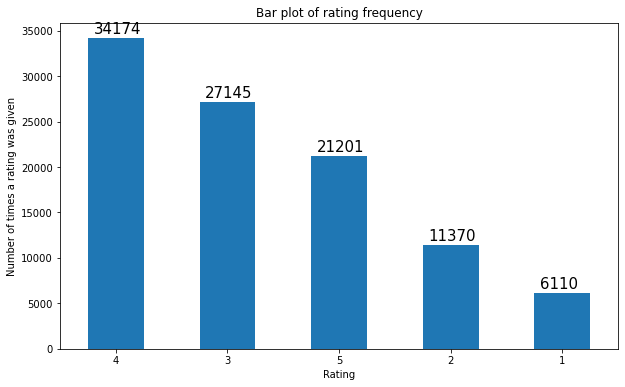

In [286]:
merged_dataset['rating'].value_counts(sort=True).plot(kind='bar' ,figsize=(10,6), use_index = True, rot=0)
# rot - rotation of ticks on x and y 
plt.title('Bar plot of rating frequency')
plt.xlabel('Rating')
plt.ylabel('Number of times a rating was given')
label = list(merged_dataset['rating'].value_counts(sort=True))
#print(label)

# Plotting the values of Ratings
r4 = [1,2,3,4,5]
for i in range(len(label)):
  plt.text(x = r4[i]-1.2 , y = label[i]+500, s = label[i], size =15)


In [287]:
# Average Rating Sorted by Desc
# Group them by Movie Title and take Mean of Ratings for all users
avg_highly_rated_movies = merged_dataset.groupby(['movie title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
avg_highly_rated_movies = avg_highly_rated_movies.to_frame()  


avg_highly_rated_movies.head(20)

,rating
movie title,
They Made Me a Criminal (1939),5.000000
Marlene Dietrich: Shadow and Light (1996),5.000000
"Saint of Fort Washington, The (1993)",5.000000
Someone Else's America (1995),5.000000
Star Kid (1997),5.000000
"Great Day in Harlem, A (1994)",5.000000
Aiqing wansui (1994),5.000000
Santa with Muscles (1996),5.000000
Prefontaine (1997),5.000000


In [288]:
print("Number of movies with 5 star rating on average: ",len(avg_highly_rated_movies[avg_highly_rated_movies['rating'] == 5.0]))
print("Number of movies with 4 - 5 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 4.0) & (avg_highly_rated_movies['rating'] < 5.0)]))
print("Number of movies with 3 - 4 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 3.0) & (avg_highly_rated_movies['rating'] < 4.0)]))
print("Number of movies with 2 - 3 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 2.0) & (avg_highly_rated_movies['rating'] < 3.0)]))
print("Number of movies with 1 - 2 star rating on average: ",len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] >= 1.0) & (avg_highly_rated_movies['rating'] < 2.0)]))
print("Number of movies with below 1 star rating on average: ", len(avg_highly_rated_movies[(avg_highly_rated_movies['rating'] < 1.0)]))


Number of movies with 5 star rating on average:  10
Number of movies with 4 - 5 star rating on average:  163
Number of movies with 3 - 4 star rating on average:  871
Number of movies with 2 - 3 star rating on average:  492
Number of movies with 1 - 2 star rating on average:  128
Number of movies with below 1 star rating on average:  0


### Top average ratings

In [289]:
# Avg Highly Rated Movies to suggest to New Users
avg_highly_rated_movies.reset_index(level=0, inplace=True)
avg_highly_rated_movies.columns = ['movie title', 'avg rating']

In [290]:
avg_highly_rated_movies.head(10)

,movie title,avg rating
0,They Made Me a Criminal (1939),5.0
1,Marlene Dietrich: Shadow and Light (1996),5.0
2,"Saint of Fort Washington, The (1993)",5.0
3,Someone Else's America (1995),5.0
4,Star Kid (1997),5.0
5,"Great Day in Harlem, A (1994)",5.0
6,Aiqing wansui (1994),5.0
7,Santa with Muscles (1996),5.0
8,Prefontaine (1997),5.0
9,Entertaining Angels: The Dorothy Day Story (1996),5.0


These are the top 10 movies that can be naviely suggested to the new users, Recommendations based on top average ratings

In [291]:
# Total ratings with to movies (SUM)
merged_dataset.groupby(['movie title']).agg({"rating":"sum"})['rating'].sort_values(ascending=False)


movie title
Star Wars (1977)                             2541
Fargo (1996)                                 2111
Return of the Jedi (1983)                    2032
Contact (1997)                               1936
Raiders of the Lost Ark (1981)               1786
                                             ... 
T-Men (1947)                                    1
JLG/JLG - autoportrait de décembre (1994)       1
Careful (1992)                                  1
Invitation, The (Zaproszenie) (1986)            1
Hedd Wyn (1992)                                 1
Name: rating, Length: 1664, dtype: int64

### Top Popular Movies List

In [292]:
# Make popular movies DF , and sort them by desc , Take count for Rating because we want the number users that have watched
popular_movies = merged_dataset.groupby(['movie title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)
popular_movies = popular_movies.to_frame()
popular_movies.reset_index(level=0, inplace=True)
popular_movies.columns = ['movie title', 'Number of Users watched']


In [293]:
popular_movies[popular_movies['Number of Users watched'] >= 400]


,movie title,Number of Users watched
0,Star Wars (1977),583
1,Contact (1997),509
2,Fargo (1996),508
3,Return of the Jedi (1983),507
4,Liar Liar (1997),485
5,"English Patient, The (1996)",481
6,Scream (1996),478
7,Toy Story (1995),452
8,Air Force One (1997),431
9,Independence Day (ID4) (1996),429


### Highly Rated and Popular Using a Threshold.

In [294]:
highly_rated_popular_movies = pd.merge(avg_highly_rated_movies, popular_movies, how = 'inner', on='movie title')
highly_rated_popular_movies.head(10)


,movie title,avg rating,Number of Users watched
0,They Made Me a Criminal (1939),5.0,1
1,Marlene Dietrich: Shadow and Light (1996),5.0,1
2,"Saint of Fort Washington, The (1993)",5.0,2
3,Someone Else's America (1995),5.0,1
4,Star Kid (1997),5.0,3
5,"Great Day in Harlem, A (1994)",5.0,1
6,Aiqing wansui (1994),5.0,1
7,Santa with Muscles (1996),5.0,2
8,Prefontaine (1997),5.0,3
9,Entertaining Angels: The Dorothy Day Story (1996),5.0,1


In [295]:
highly_rated_popular_movies[highly_rated_popular_movies['Number of Users watched']>400]


,movie title,avg rating,Number of Users watched
23,Star Wars (1977),4.358491,583
34,"Godfather, The (1972)",4.283293,413
40,Raiders of the Lost Ark (1981),4.252381,420
64,Fargo (1996),4.155512,508
129,Return of the Jedi (1983),4.007890,507
236,Toy Story (1995),3.878319,452
292,Contact (1997),3.803536,509
412,"English Patient, The (1996)",3.656965,481
428,Air Force One (1997),3.631090,431
597,Scream (1996),3.441423,478


In [296]:
highly_rated_popular_movies[(highly_rated_popular_movies['Number of Users watched']>300) & (highly_rated_popular_movies['avg rating']>=4.0)]


,movie title,avg rating,Number of Users watched
23,Star Wars (1977),4.358491,583
32,"Silence of the Lambs, The (1991)",4.289744,390
34,"Godfather, The (1972)",4.283293,413
40,Raiders of the Lost Ark (1981),4.252381,420
45,Titanic (1997),4.245714,350
49,"Empire Strikes Back, The (1980)",4.204360,367
61,"Princess Bride, The (1987)",4.172840,324
64,Fargo (1996),4.155512,508
98,Monty Python and the Holy Grail (1974),4.066456,316
101,Pulp Fiction (1994),4.060914,394


### Recommendations based on Movie Genre to a New User.


In [297]:
movie_genre_list = column_names2[-19:]
print(movie_genre_list)


['unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [298]:
count = []
for i in movie_genre_list:
  genre_based_movies = items_dataset[['movie id','movie title',i]]
  genre_based_movies = genre_based_movies[genre_based_movies[i] == 1]
  #print(len(genre_based_movies))
  count.append(len(genre_based_movies))
  


    Movie genre  Number of movies
0       unknown                 2
1        Action               251
2     Adventure               135
3     Animation                42
4      Children               122
5        Comedy               505
6         Crime               109
7   Documentary                50
8         Drama               725
9       Fantasy                22
10    Film-Noir                24
11       Horror                92
12      Musical                56
13      Mystery                61
14      Romance               247
15       Sci-Fi               101
16     Thriller               251
17          War                71
18      Western                27


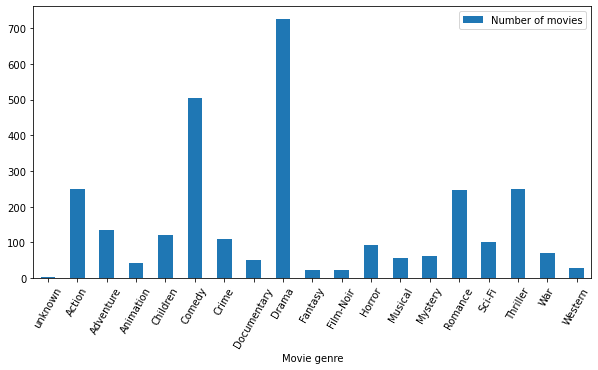

In [299]:
df = pd.DataFrame({'Movie genre':movie_genre_list, 'Number of movies':count})
print(df)
ax = df.plot.bar(x='Movie genre', y='Number of movies', rot=60, figsize=(10, 5))


We can see that most of the movies belong to movie genre : Drama followed by Comedy then Action, Romance and Thriller



In [304]:
# For Graph plotting of a DF
def star_based_visualization(dataframe):
  dataframe['rating'].value_counts(sort=True).plot(kind='bar' ,figsize=(10,6), use_index = True, rot=0)
  plt.title('Bar plot of rating frequency')
  plt.xlabel('Rating')
  plt.ylabel('Number of times a rating was given')
  label = list(dataframe['rating'].value_counts(sort=True))
  plt.show()
  print("Total number of users watched this Genre: ",len(dataframe))
  print("  ")


In [305]:
def recommendations_genre(genre):
  x = genre
  print("______________________     _________________________     ______________________")
  print("______________________     ##### GENRE: ", x," #####     ______________________")
  print("    ")
  genre_based_movies = items_dataset[['movie id','movie title',x]]
  genre_based_movies = genre_based_movies[genre_based_movies[x] == 1]
  merged_genre_movies = pd.merge(dataset, genre_based_movies, how='inner', on='movie id')
  # merged_genre_movies.head()

  #Visualize the Graph Genre
  star_based_visualization(merged_genre_movies)

  #Based on Top Average Ratings  
  high_rated_movies = merged_genre_movies.groupby(['movie title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
  high_rated_movies = high_rated_movies.to_frame()
  print("These are the top movies that can be naviely suggested to the new users for the requested movie genre:", x, ". Recommendations based on top average ratings.")
  print(high_rated_movies.head(10))
  
  
  print("______________________     _________________________     ______________________")
  print("\n")
  #Based on Top Popularity
  popular_movies_ingenre = merged_genre_movies.groupby(['movie title']).agg({"rating":"count"})['rating'].sort_values(ascending=False)
  popular_movies_ingenre = popular_movies_ingenre.to_frame()
  popular_movies_ingenre.reset_index(level=0, inplace=True)
  popular_movies_ingenre.columns = ['movie title', 'Number of Users watched']
  print("These are the most popular movies which can be recommended to a new user in",x,"genre. Recommendations based on Popularity")
  print(popular_movies_ingenre.sort_values('Number of Users watched', ascending=False).head(10))
  
  
  print("______________________    _________________________     ______________________")
  print("\n")

  #Based on Top Popularity and Rating using a Threshold for Both. 
  highly_rated_popular_movies = pd.merge(high_rated_movies, popular_movies_ingenre, how = 'inner', on='movie title')
  # highly_rated_popular_movies.head(10)
  # Give user the Value Input for Filters.
  viewer_threshold = 300
  ratings_threshold = 4.0
  count = 0
  check = 0
  while viewer_threshold > 0 and ratings_threshold > 0:
    s = highly_rated_popular_movies[(highly_rated_popular_movies['Number of Users watched']>viewer_threshold) & (highly_rated_popular_movies['rating']>=ratings_threshold)]
    if len(s) < 11:
      if check == 0:
        viewer_threshold -= 50
        check = 1
      else:
        ratings_threshold -= 0.5
        check = 0
    else:
      break
  print("Here's some Popular and Highest Rated movies just for you...")
  print("with ratings more than ",ratings_threshold," and atleast ",viewer_threshold ," other viewers.")

  print("**Recommendations based popularity and rating. These are top rated popular movies**")
  print(s)
  print("______________________     _________________________     ______________________")
  print("\n")



______________________     _________________________     ______________________
______________________     ##### GENRE:  Action  #####     ______________________
    


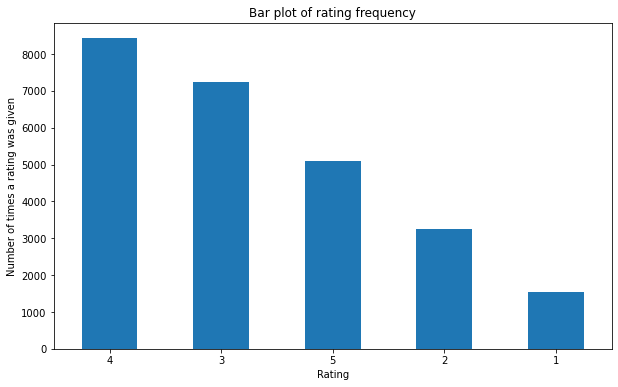

Total number of users watched this Genre:  25589
  
These are the top movies that can be naviely suggested to the new users for the requested movie genre: Action . Recommendations based on top average ratings.
                                   rating
movie title                              
Star Wars (1977)                 4.358491
Godfather, The (1972)            4.283293
Raiders of the Lost Ark (1981)   4.252381
Titanic (1997)                   4.245714
Empire Strikes Back, The (1980)  4.204360
Boot, Das (1981)                 4.203980
Godfather: Part II, The (1974)   4.186603
African Queen, The (1951)        4.184211
Princess Bride, The (1987)       4.172840
Braveheart (1995)                4.151515
______________________     _________________________     ______________________


These are the most popular movies which can be recommended to a new user in Action genre. Recommendations based on Popularity
                       movie title  Number of Users watched
0                 

In [307]:
# for i in movie_genre_list[1:]:
#   recommendations_genre(i)

recommendations_genre("Action")